Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from keras.losses import MeanSquaredLogarithmicError
from keras.models import load_model
import ast
# from keras.preprocessing.sequence import pad_sequences

Mounted at /content/drive


# Loading CSV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Skripsi/dataframe_sift.csv',
                 converters={'Carbon Values': lambda x: float(x.replace(',', '.'))})

# df = df.drop('Unnamed: 0',axis=1 )

df

,HST,Feature Extraction 0,Feature Extraction 1,Feature Extraction 2,Feature Extraction 3,Feature Extraction 4,Feature Extraction 5,Feature Extraction 6,Feature Extraction 7,Feature Extraction 8,...,Descriptors 2167,Descriptors 2168,Descriptors 2169,Descriptors 2170,Descriptors 2171,Descriptors 2172,Descriptors 2173,Descriptors 2174,Descriptors 2175,Carbon Values
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,26.0,74.0,34.0,2.0,0.0,0.0,0.0,28.65
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,28.65
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,28.65
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,7.0,0.0,0.0,0.0,0.0,5.0,9.0,4.0,28.65
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,79.0,61.0,36.0,2.0,0.0,0.0,0.0,1.0,26.0,28.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,96.0,6.0,3.0,15.0,79.0,131.0,16.0,5.0,8.0,39.15
3400,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,96.0,6.0,3.0,15.0,79.0,131.0,16.0,5.0,8.0,39.15
3401,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,1.0,0.0,0.0,5.0,2.0,0.0,37.46
3402,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,1.0,0.0,0.0,5.0,2.0,0.0,37.46


# Preprocess Data

In [ ]:
# Check for NaN values in the 'Feature Extraction' and 'Descriptors' columns
nan_rows_fe = df[df['Feature Extraction 0'].isna()]
nan_rows_d = df[df['Descriptors 0'].isna()]

if not nan_rows_fe.empty:
    print(f'Found {len(nan_rows_fe)} rows with NaN values in the Feature Extraction column.')
    df = df.dropna(subset=['Feature Extraction 0'])

if not nan_rows_d.empty:
    print(f'Found {len(nan_rows_d)} rows with NaN values in the Descriptors column.')
    df = df.dropna(subset=['Descriptors 0'])

# Split Feature and Target

In [ ]:

X = df.drop('Carbon Values', axis=1)
y = df['Carbon Values']

In [ ]:
df

,HST,Feature Extraction 0,Feature Extraction 1,Feature Extraction 2,Feature Extraction 3,Feature Extraction 4,Feature Extraction 5,Feature Extraction 6,Feature Extraction 7,Feature Extraction 8,...,Descriptors 2167,Descriptors 2168,Descriptors 2169,Descriptors 2170,Descriptors 2171,Descriptors 2172,Descriptors 2173,Descriptors 2174,Descriptors 2175,Carbon Values
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,26.0,74.0,34.0,2.0,0.0,0.0,0.0,28.65
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,28.65
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,28.65
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,7.0,0.0,0.0,0.0,0.0,5.0,9.0,4.0,28.65
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,79.0,61.0,36.0,2.0,0.0,0.0,0.0,1.0,26.0,28.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,96.0,6.0,3.0,15.0,79.0,131.0,16.0,5.0,8.0,39.15
3400,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,96.0,6.0,3.0,15.0,79.0,131.0,16.0,5.0,8.0,39.15
3401,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,1.0,0.0,0.0,5.0,2.0,0.0,37.46
3402,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,1.0,0.0,0.0,5.0,2.0,0.0,37.46


# Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape to 1D Tensor

In [ ]:
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

y_train = y_train.values
y_test = y_test.values

# Tensorflow Model Architecture

In [ ]:
from keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import MaxAbsScaler


X_train_flattened = np.array([x.flatten() for x in X_train])
X_test_flattened = np.array([x.flatten() for x in X_test])
scaler = MaxAbsScaler()
X_train_normalized = scaler.fit_transform(X_train_flattened)
X_test_normalized = scaler.transform(X_test_flattened)

X_train_normalized = [x.reshape(-1, 1) for x in X_train_normalized]
X_test_normalized = [x.reshape(-1, 1) for x in X_test_normalized]

X_train_padded = np.expand_dims(X_train_normalized , axis=-1)
X_test_padded = np.expand_dims(X_test_normalized , axis=-1)


In [ ]:
# from keras.layers import Input, Conv1D, GlobalAveragePooling1D, Dense
from keras.models import Model
from keras.layers import Input, Conv1D, GlobalAveragePooling1D, Dense, Dropout, MaxPooling1D, BatchNormalization

inputs = Input(shape=(None, 1))

# Add the layers with pooling and dropout
x = Conv1D(filters=16, kernel_size=3, activation='relu')(inputs)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=32, kernel_size=3, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=64, kernel_size=3, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(filters=128, kernel_size=3, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = GlobalAveragePooling1D()(x)

x = Dense(128, activation='relu', kernel_regularizer='l2')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)

# Define the output
outputs = Dense(1)(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)


Model Parameters

In [ ]:
model.compile(optimizer='Adam', loss='mean_absolute_percentage_error')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor=0.1,
                                                     patience=30,
                                                     min_lr=1e-7)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=30,
                                              verbose=1,
                                              restore_best_weights=True)

Model Training

In [ ]:
hist = model.fit(X_train_padded, y_train,
                 epochs= 300,
                 batch_size=64, verbose = 1,
                 callbacks=[reduce_lr,early_stop],
                 validation_data = (X_test_padded, y_test))

Epoch 1/300
43/43 [==============================] - 11s 48ms/step - loss: 82.1059 - val_loss: 74.1457 - lr: 0.0010
Epoch 2/300
43/43 [==============================] - 1s 30ms/step - loss: 37.6992 - val_loss: 39.3783 - lr: 0.0010
Epoch 3/300
43/43 [==============================] - 1s 31ms/step - loss: 30.0509 - val_loss: 32.1477 - lr: 0.0010
Epoch 4/300
43/43 [==============================] - 1s 32ms/step - loss: 25.2582 - val_loss: 36.3003 - lr: 0.0010
Epoch 5/300
43/43 [==============================] - 1s 31ms/step - loss: 21.4823 - val_loss: 39.4265 - lr: 0.0010
Epoch 6/300
43/43 [==============================] - 1s 29ms/step - loss: 18.7010 - val_loss: 37.5359 - lr: 0.0010
Epoch 7/300
43/43 [==============================] - 1s 29ms/step - loss: 16.2907 - val_loss: 33.5748 - lr: 0.0010
Epoch 8/300
43/43 [==============================] - 1s 30ms/step - loss: 15.8371 - val_loss: 32.3866 - lr: 0.0010
Epoch 9/300
43/43 [==============================] - 1s 29ms/step - loss: 14.48

Evaluate Model

In [ ]:
# Evaluate the model
# y_pred = model.predict(X_test)
y_pred = model.predict(X_test_padded)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape}')

22/22 [==============================] - 1s 12ms/step
MAPE: 0.1299952124891541


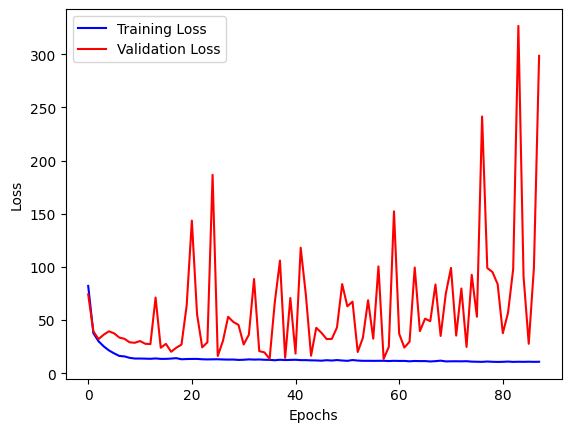

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='Training Loss', color='blue')
plt.plot(hist.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_test = r2_score(y_test, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)




R-squared score on test set: 0.7000222934020768
Mean Absolute Error (MAE): 3.8053647029837494
Root Mean Squared Error (RMSE): 4.729229837222571


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred.flatten(), y_test.flatten(), 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


# SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import MaxAbsScaler

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR model with a linear kernel
model_svr = SVR(kernel="linear", verbose=3)

# Train the model_svr
model_svr.fit(X_train_scaled, y_train)

# Evaluate the model_svr
score = model_svr.score(X_test_scaled, y_test)
print("Model score:", score)


[LibSVM]Model score: 0.6526895961706655


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model_svr.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)


R-squared score on test set: 0.6526895961706655
Mean Absolute Error (MAE): 3.790715752180819
Root Mean Squared Error (RMSE): 5.088676319668694
Mean Absolute Percentage Error (MAPE): 0.148001852001099


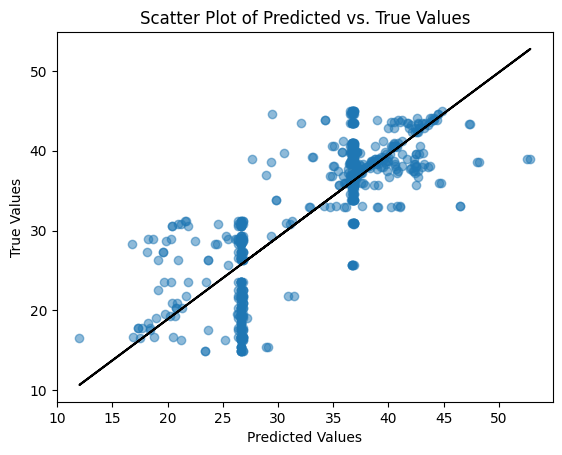

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


# Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import r2_score

# Preprocess the data
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create AdaBoostRegressor model
model_adaboost = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear')

# Train the model_adaboost
model_adaboost.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model_adaboost.predict(X_test_scaled)

# Evaluate the model
score = r2_score(y_test, y_pred)
print("Model score:", score)


Model score: 0.7471029797168092


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model_adaboost.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred)

print("R-squared score on test set:", r2_test)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared score on test set: 0.7471029797168092
Mean Absolute Error (MAE): 3.5612893743285303
Root Mean Squared Error (RMSE): 4.342279625587592
Mean Absolute Percentage Error (MAPE): 0.12983875564512723


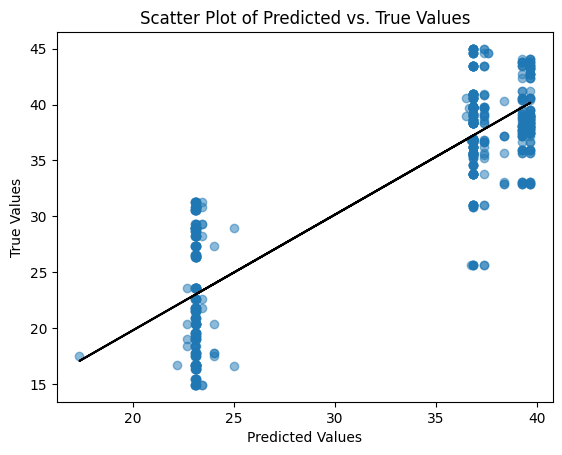

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create scatter plot
plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs. True Values')

# Calculate the trend line (line of best fit)
m, b = np.polyfit(y_pred, y_test, 1)
plt.plot(y_pred.flatten(), m*y_pred.flatten() + b, color='black')

plt.show()


# Model Saving

In [ ]:
import pickle

model_filename = 'model_sift_v2.h5'

model.save('/content/drive/MyDrive/Skripsi/model/'+ model_filename)

scaler_filename = 'scaler_sift.pkl'
scaler_filepath = '/content/drive/MyDrive/Skripsi/model/' + scaler_filename

with open(scaler_filepath, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
